# Random Walk Model – NVIDIA (NVDA)

In this notebook, we implement a Random Walk model to forecast NVIDIA stock prices.
The Random Walk assumes that future price changes are independent and unpredictable.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(
    "../data/stock_data.csv",
    index_col=0,      # Date index hai
    parse_dates=True
)

df.head()


C:\Users\Wajiz.pk\AppData\Local\Temp\ipykernel_29780\3964766137.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(


,Close,High,Low,Open,Volume,Daily_Return
Price,,,,,,
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NaN
Date,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,0.4748533368110657,0.4844512004950466,0.472693835359548,0.4830115137914982,197952000,-0.016890
2015-01-06,0.4604564905166626,0.4760529693490393,0.45997660458104156,0.4755730834134183,197764000,-0.030319
2015-01-07,0.4592567980289459,0.46789485997472313,0.45781711150338267,0.4638157576868942,321808000,-0.002605


In [7]:

df["Close"] = pd.to_numeric(df["Close"], errors="coerce")


df["Returns"] = df["Close"].pct_change()

df["Returns"].head()


Price
Ticker             NaN
Date               NaN
2015-01-05         NaN
2015-01-06   -0.030319
2015-01-07   -0.002605
Name: Returns, dtype: float64

In [10]:
import numpy as np

np.random.seed(42)

last_price = df["Close"].iloc[-1]
mu = df["Returns"].mean()
sigma = df["Returns"].std()

n_days = 30

random_returns = np.random.normal(mu, sigma, n_days)
random_walk_prices = last_price * np.cumprod(1 + random_returns)



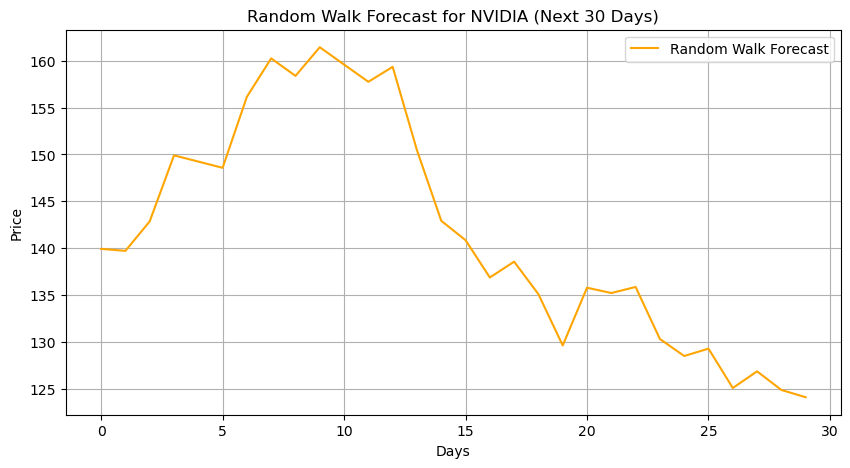

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(random_walk_prices, label="Random Walk Forecast", color="orange")
plt.title("Random Walk Forecast for NVIDIA (Next 30 Days)")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


## Interpretation

The Random Walk model produces unpredictable future price paths, reflecting market uncertainty.
This supports the Efficient Market Hypothesis, which suggests that stock prices follow a random process and cannot be consistently predicted using historical information.
